In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
import matplotlib.colors as mcolors


In [ ]:
n_of_bins = 15

In [ ]:
#NON CENTERED

#load in the parameters 

nc_parameters = np.load("nc_parameters.npy")

nc_c = 'lightblue'
nc_outline = 'cornflowerblue'

nc_ellip_in_comp1 = nc_parameters[0]
nc_ellip_out_comp1 = nc_parameters[1]
nc_flux_in_comp1 = nc_parameters[2]
nc_flux_out_comp1 = nc_parameters[3]
nc_ellip_in_comp2 = nc_parameters[4]
nc_ellip_out_comp2 = nc_parameters[5]
nc_flux_in_comp2 = nc_parameters[6]
nc_flux_out_comp2 = nc_parameters[7]
nc_flux_in_blends = nc_parameters[8]
nc_flux_out_blends = nc_parameters[9]

In [ ]:
#Calculate the standard deviations 
def calc_std(parameters):
    num_of_params = len(parameters)
    standard_dev_of_params = np.zeros(num_of_params)
    for i in range(0,num_of_params):
        standard_dev_of_params[i] = np.std(parameters[i])
    return standard_dev_of_params

In [ ]:
#Call this if you want to calculated standard deviations
#std_of_params = calc_std(parameters)

In [ ]:
def nc_ellip1_plot(ellip_in_comp1, ellip_out_comp1, c, outline):
    
        
    ellip1_errors = []
    
    min_of_bins_ellip1 = np.min(ellip_in_comp1)
    max_of_bins_ellip1 = np.max(ellip_in_comp1)
    ellip1_bins = np.linspace(min_of_bins_ellip1, max_of_bins_ellip1, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip1A = (ellip_in_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1B = (ellip_out_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1_errors.append(ellip1B - ellip1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp1, bins = n_of_bins, range = [min_of_bins_ellip1, max_of_bins_ellip1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp1, ellip_out_comp1, gridsize=30, cmap='Blues', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Component 1 [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp1), np.max(ellip_out_comp1)])

    ellip1_bin_centres = 0.5 * (ellip1_bins[:-1] + ellip1_bins[1:])
    ellip1_bin_widths = 0.9 * (ellip1_bins[1] - ellip1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")

    bp = ax2.violinplot(ellip1_errors, positions=ellip1_bin_centres, widths=ellip1_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax2.set_xlabel("Ellipticity of Component 1 [Input]")
    plt.xlim(min_of_bins_ellip1, max_of_bins_ellip1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

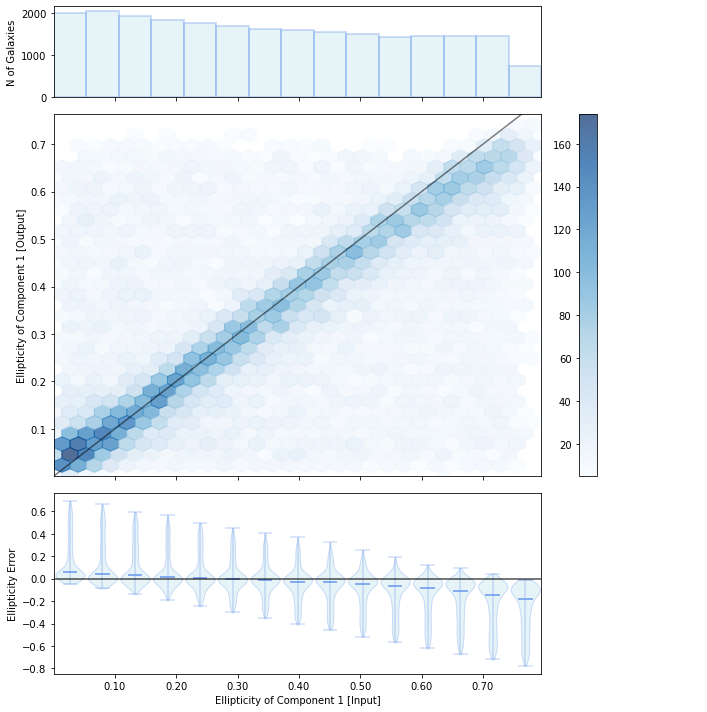

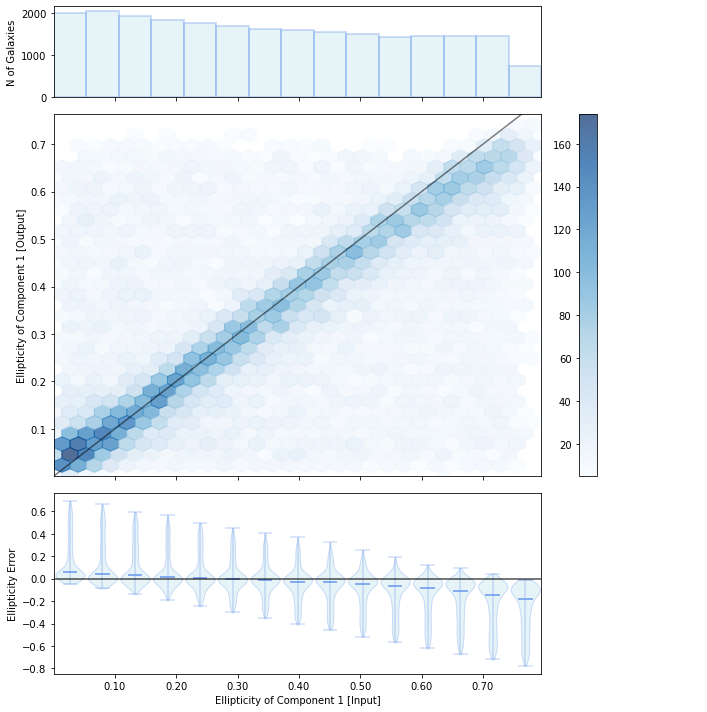

In [ ]:
nc_ellip1_plot(nc_ellip_in_comp1, nc_ellip_out_comp1, nc_c, nc_outline)

In [ ]:
def nc_ellip2_plot(ellip_in_comp2, ellip_out_comp2, c, outline):
    
        
    ellip2_errors = []
    
    min_of_bins_ellip2 = np.min(ellip_in_comp2)
    max_of_bins_ellip2 = np.max(ellip_in_comp2)
    ellip2_bins = np.linspace(min_of_bins_ellip2, max_of_bins_ellip2, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip2A = (ellip_in_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2B = (ellip_out_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2_errors.append(ellip2B - ellip2A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp2, bins = n_of_bins, range = [min_of_bins_ellip2, max_of_bins_ellip2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp2, ellip_out_comp2, gridsize=30, cmap='Blues', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Component 2 [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp2), np.max(ellip_out_comp2)])

    ellip2_bin_centres = 0.5 * (ellip2_bins[:-1] + ellip2_bins[1:])
    ellip2_bin_widths = 0.9 * (ellip2_bins[1] - ellip2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")

    bp = ax2.violinplot(ellip2_errors, positions=ellip2_bin_centres, widths=ellip2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax2.set_xlabel("Ellipticity of Component 2 [Input]")
    plt.xlim(min_of_bins_ellip2, max_of_bins_ellip2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

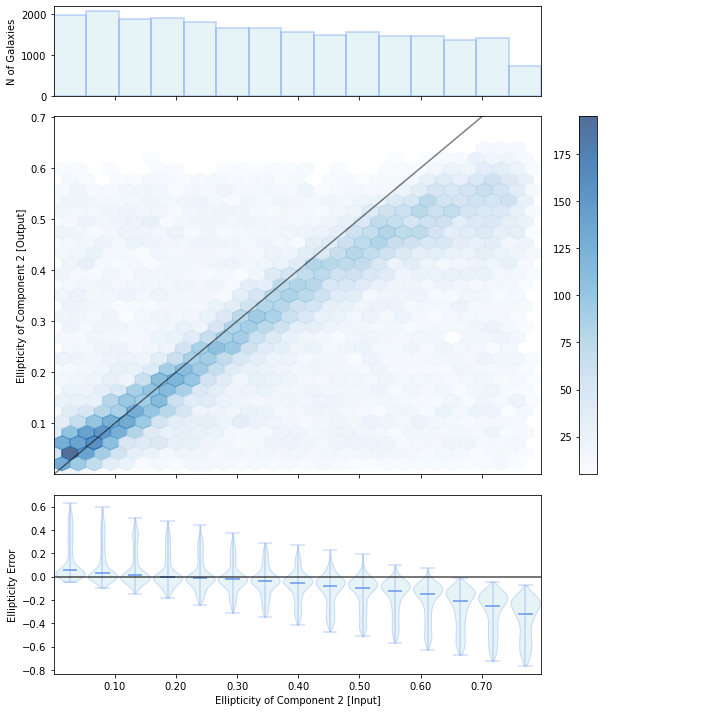

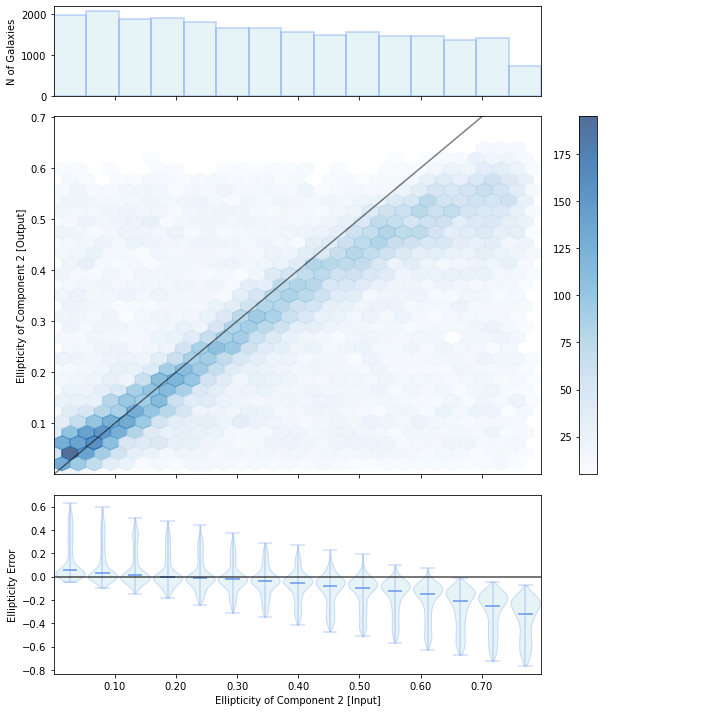

In [ ]:
nc_ellip2_plot(nc_ellip_in_comp2, nc_ellip_out_comp2, nc_c, nc_outline)

In [ ]:
def nc_flux1_plot(flux_in_comp1, flux_out_comp1, c, outline):
    
        
    flux1_errors = []
    
    min_of_bins_flux1 = np.min(flux_in_comp1)
    max_of_bins_flux1 = np.max(flux_in_comp1)
    flux1_bins = np.linspace(min_of_bins_flux1, max_of_bins_flux1, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux1A = (flux_in_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1B = (flux_out_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1_errors.append(flux1B - flux1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp1, bins = n_of_bins, range = [min_of_bins_flux1, max_of_bins_flux1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp1, flux_out_comp1, gridsize=30, cmap='Blues', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Component 1 [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp1), np.max(flux_out_comp1)])

    flux1_bin_centres = 0.5 * (flux1_bins[:-1] + flux1_bins[1:])
    flux1_bin_widths = 0.9 * (flux1_bins[1] - flux1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")


    #Patch artit = True allows object to be treated as customisable shape
    
    """
    bp = ax2.boxplot(flux1_errors, positions=flux1_bin_centres, widths=flux1_bin_widths, patch_artist = True,
                    boxprops=dict(facecolor=c, color=outline, linewidth = 2, alpha = 0.3),
                    capprops=dict(color=outline, linewidth = 2),
                    whiskerprops=dict(color=outline, linewidth = 2),
                    flierprops=dict(color=outline, markeredgecolor=outline, linewidth = 2, alpha = 0.7),
                    medianprops=dict(color=outline, linewidth = 2),
                     )
    """
    bp = ax2.violinplot(flux1_errors, positions=flux1_bin_centres, widths=flux1_bin_widths, showmedians = True)

    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)

    
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Component 1 [Input]")
    plt.xlim(min_of_bins_flux1, max_of_bins_flux1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

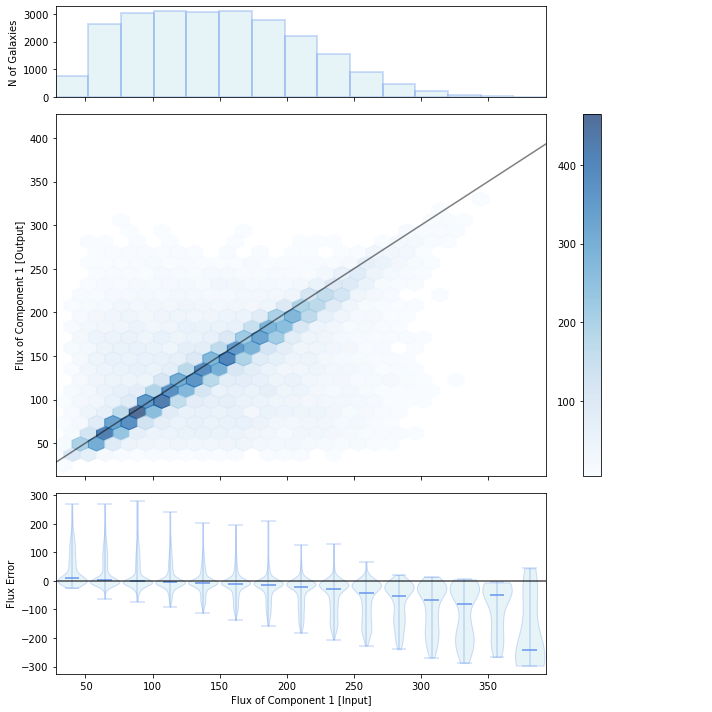

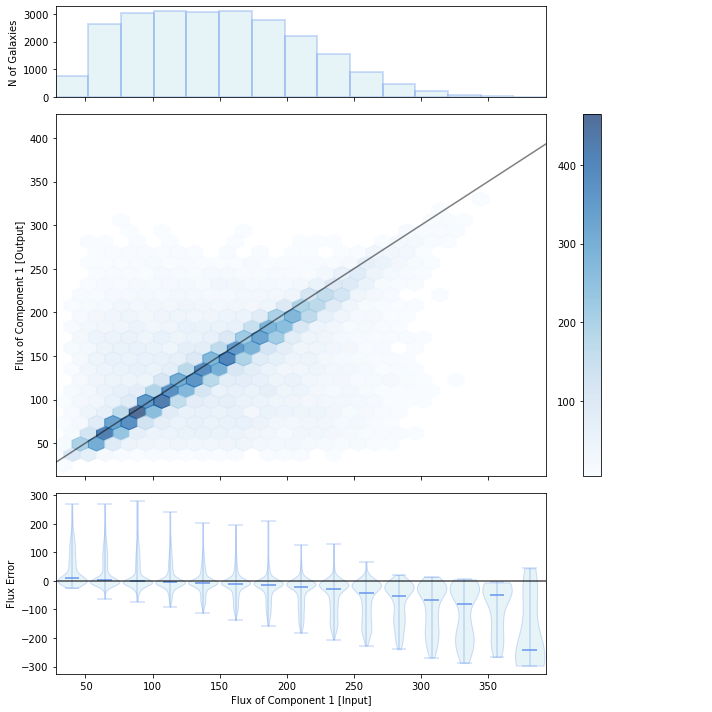

In [ ]:
nc_flux1_plot(nc_flux_in_comp1, nc_flux_out_comp1, nc_c, nc_outline)

In [ ]:
def nc_flux2_plot(flux_in_comp2, flux_out_comp2, c, outline):
    
        
    flux2_errors = []
    
    min_of_bins_flux2 = np.min(flux_in_comp2)
    max_of_bins_flux2 = np.max(flux_in_comp2)
    flux2_bins = np.linspace(min_of_bins_flux2, max_of_bins_flux2, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux2A = (flux_in_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2B = (flux_out_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2_errors.append(flux2B - flux2A)
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp2, bins = n_of_bins, range = [min_of_bins_flux2, max_of_bins_flux2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp2, flux_out_comp2, gridsize=30, cmap='Blues', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Component 2 [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp2), np.max(flux_out_comp2)])

    flux2_bin_centres = 0.5 * (flux2_bins[:-1] + flux2_bins[1:])
    flux2_bin_widths = 0.9 * (flux2_bins[1] - flux2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")
    
   
    #Patch artit = True allows object to be treated as customisable shape
    bp = ax2.violinplot(flux2_errors, positions=flux2_bin_centres, widths=flux2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Component 2 [Input]")
    plt.xlim(min_of_bins_flux2, max_of_bins_flux2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

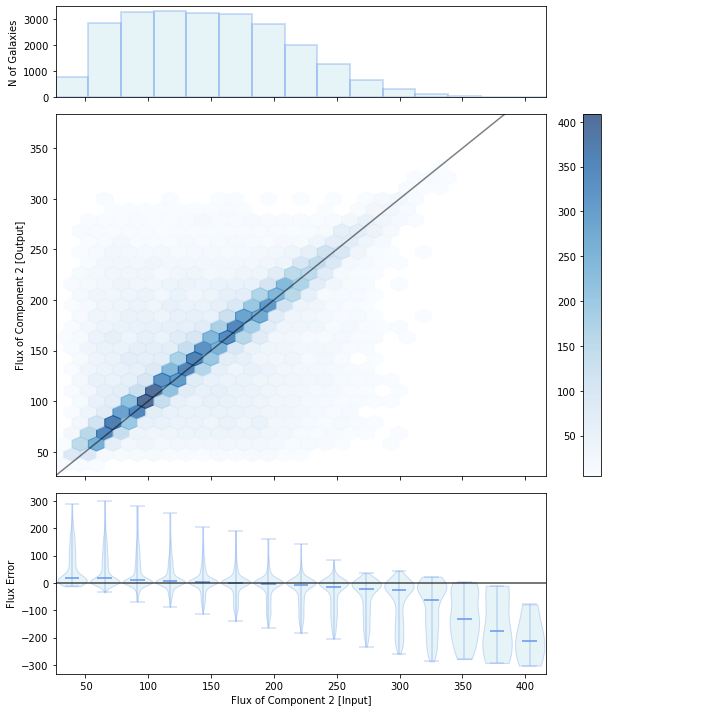

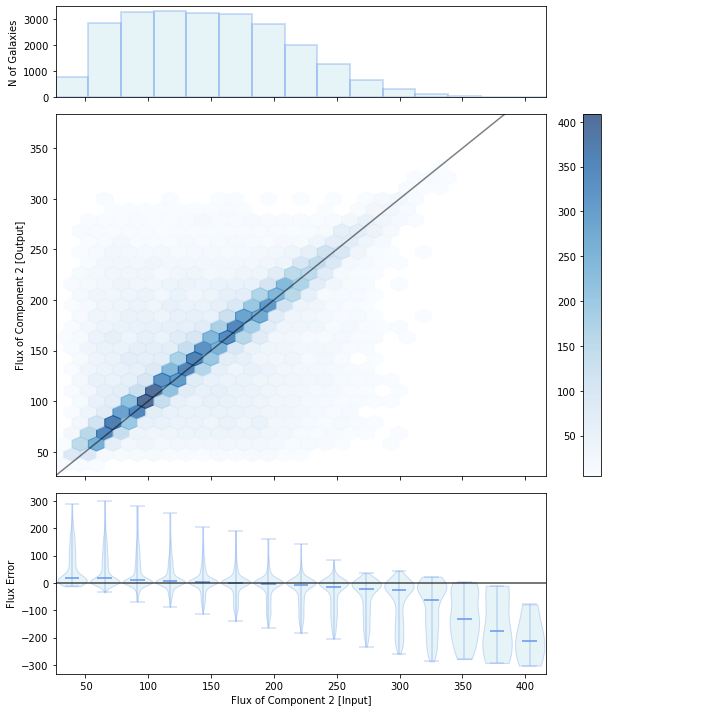

In [ ]:
nc_flux2_plot(nc_flux_in_comp2, nc_flux_out_comp2, nc_c, nc_outline)

In [ ]:
def nc_blends_plot(flux_in_blends, flux_out_blends, c, outline):
    
        
    blends_errors = []
    
    min_of_bins_blends = np.min(flux_in_blends)
    max_of_bins_blends = np.max(flux_in_blends)
    blends_bins = np.linspace(min_of_bins_blends, max_of_bins_blends, n_of_bins+1)
    
    for i in range(n_of_bins):
        blendsA = (flux_in_blends[(blends_bins[i] <= flux_in_blends) & ( flux_in_blends <= blends_bins[i+1])])
        blendsB = (flux_out_blends[(blends_bins[i] <= flux_in_blends) & ( flux_in_blends <= blends_bins[i+1])])
        blends_errors.append(blendsB - blendsA)
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_blends, bins = n_of_bins, range = [min_of_bins_blends, max_of_bins_blends], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Blends")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_blends.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_blends, flux_out_blends, gridsize=30, cmap='Blues', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Blends [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_blends), np.max(flux_out_blends)])

    blends_bin_centres = 0.5 * (blends_bins[:-1] + blends_bins[1:])
    blends_bin_widths = 0.9 * (blends_bins[1] - blends_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")


    #Patch artit = True allows object to be treated as customisable shape
    bp = ax2.violinplot(blends_errors, positions=blends_bin_centres, widths=blends_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Blends [Input]")
    plt.xlim(min_of_bins_blends, max_of_bins_blends)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

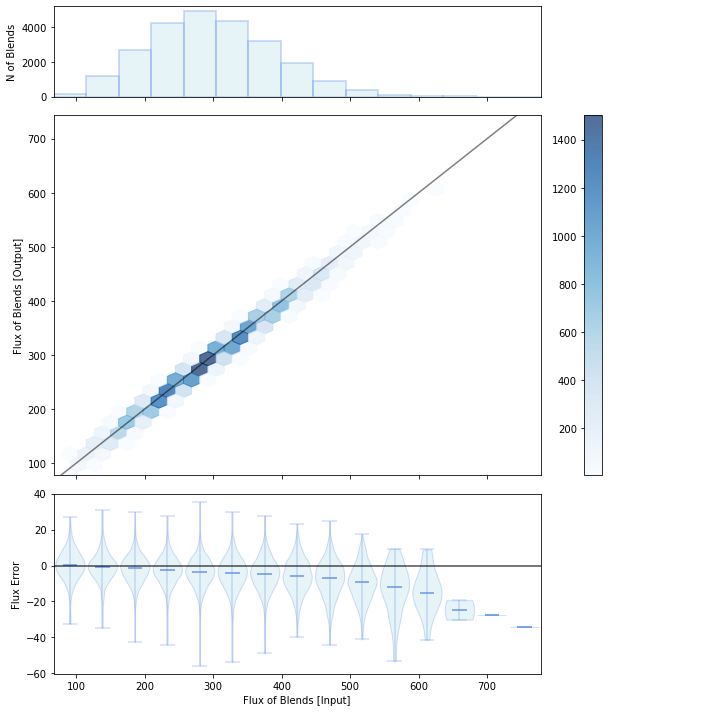

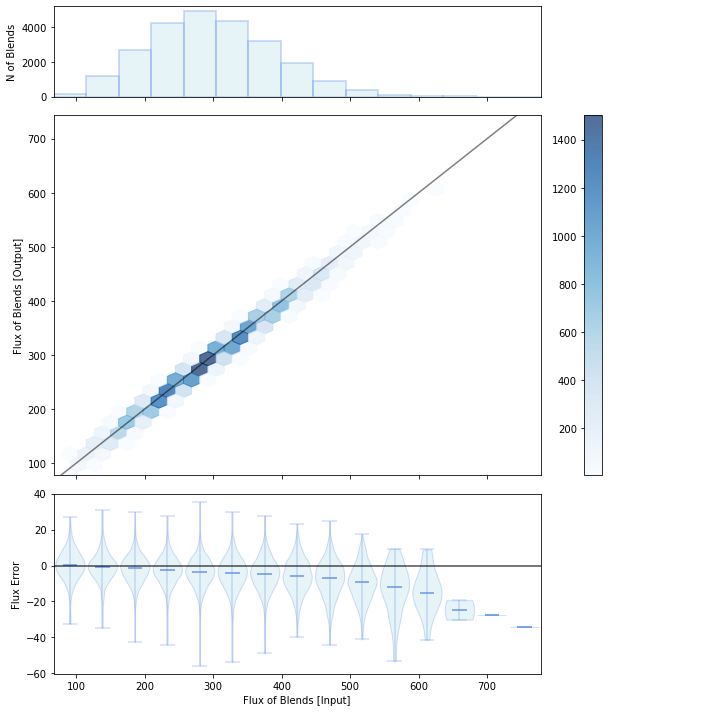

In [ ]:
nc_blends_plot(nc_flux_in_blends, nc_flux_out_blends, nc_c, nc_outline)

In [ ]:
#NON CENTERED

#load in the parameters 

c_parameters = np.load("c_parameters.npy")

c_c = 'lightgreen'
c_outline = 'green'


c_ellip_in_comp1 = c_parameters[0]
c_ellip_out_comp1 = c_parameters[1]
c_flux_in_comp1 = c_parameters[2]
c_flux_out_comp1 = c_parameters[3]
c_ellip_in_comp2 = c_parameters[4]
c_ellip_out_comp2 = c_parameters[5]
c_flux_in_comp2 = c_parameters[6]
c_flux_out_comp2 = c_parameters[7]


In [ ]:
def c_ellip1_plot(ellip_in_comp1, ellip_out_comp1, c, outline):
    
        
    ellip1_errors = []
    
    min_of_bins_ellip1 = np.min(ellip_in_comp1)
    max_of_bins_ellip1 = np.max(ellip_in_comp1)
    ellip1_bins = np.linspace(min_of_bins_ellip1, max_of_bins_ellip1, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip1A = (ellip_in_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1B = (ellip_out_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1_errors.append(ellip1B - ellip1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp1, bins = n_of_bins, range = [min_of_bins_ellip1, max_of_bins_ellip1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp1, ellip_out_comp1, gridsize=30, cmap='Greens', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Central Component [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp1), np.max(ellip_out_comp1)])

    ellip1_bin_centres = 0.5 * (ellip1_bins[:-1] + ellip1_bins[1:])
    ellip1_bin_widths = 0.9 * (ellip1_bins[1] - ellip1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")


    #Patch artit = True allows object to be treated as customisable shape
    bp = ax2.violinplot(ellip1_errors, positions=ellip1_bin_centres, widths=ellip1_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax2.set_xlabel("Ellipticity of Central Component [Input]")
    plt.xlim(min_of_bins_ellip1, max_of_bins_ellip1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

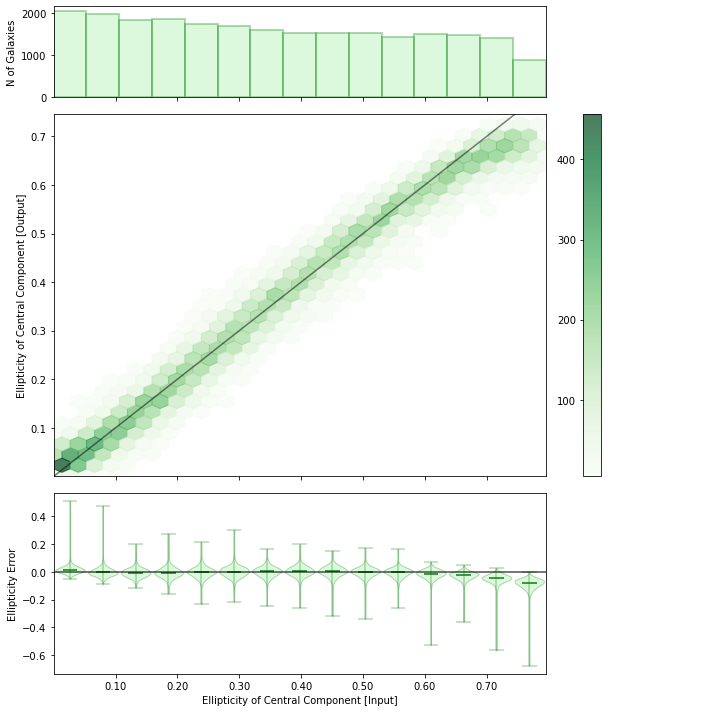

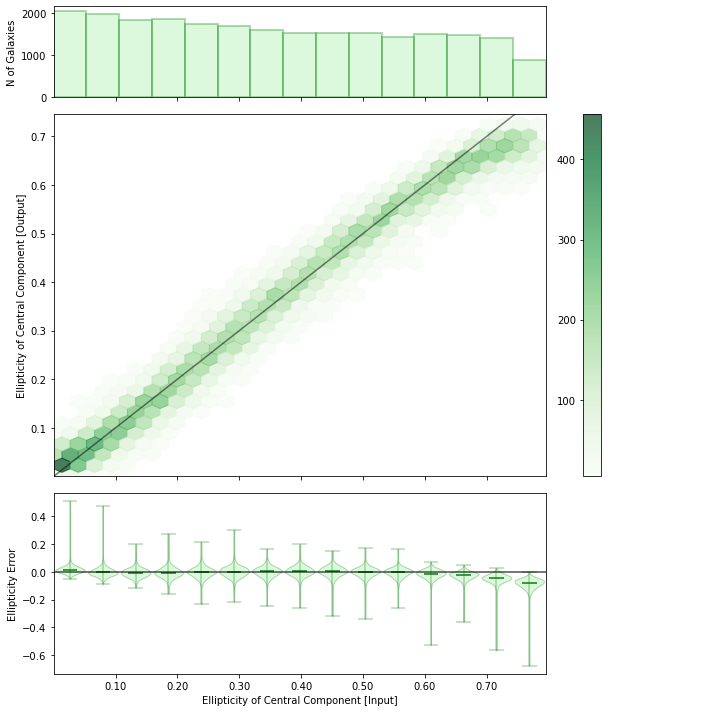

In [ ]:
c_ellip1_plot(c_ellip_in_comp1, c_ellip_out_comp1, c_c, c_outline)

In [ ]:
def c_ellip2_plot(ellip_in_comp2, ellip_out_comp2, c, outline):
    
        
    ellip2_errors = []
    
    min_of_bins_ellip2 = np.min(ellip_in_comp2)
    max_of_bins_ellip2 = np.max(ellip_in_comp2)
    ellip2_bins = np.linspace(min_of_bins_ellip2, max_of_bins_ellip2, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip2A = (ellip_in_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2B = (ellip_out_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2_errors.append(ellip2B - ellip2A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp2, bins = n_of_bins, range = [min_of_bins_ellip2, max_of_bins_ellip2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp2, ellip_out_comp2, gridsize=30, cmap='Greens', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Residual Component")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp2), np.max(ellip_out_comp2)])

    ellip2_bin_centres = 0.5 * (ellip2_bins[:-1] + ellip2_bins[1:])
    ellip2_bin_widths = 0.9 * (ellip2_bins[1] - ellip2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")


    bp = ax2.violinplot(ellip2_errors, positions=ellip2_bin_centres, widths=ellip2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax2.set_xlabel("Ellipticity of Non-centered Component")
    plt.xlim(min_of_bins_ellip2, max_of_bins_ellip2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

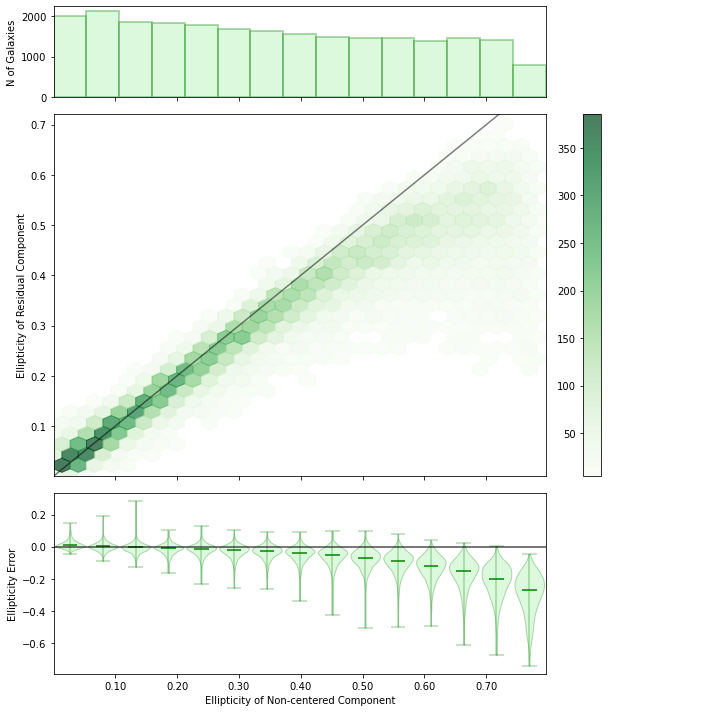

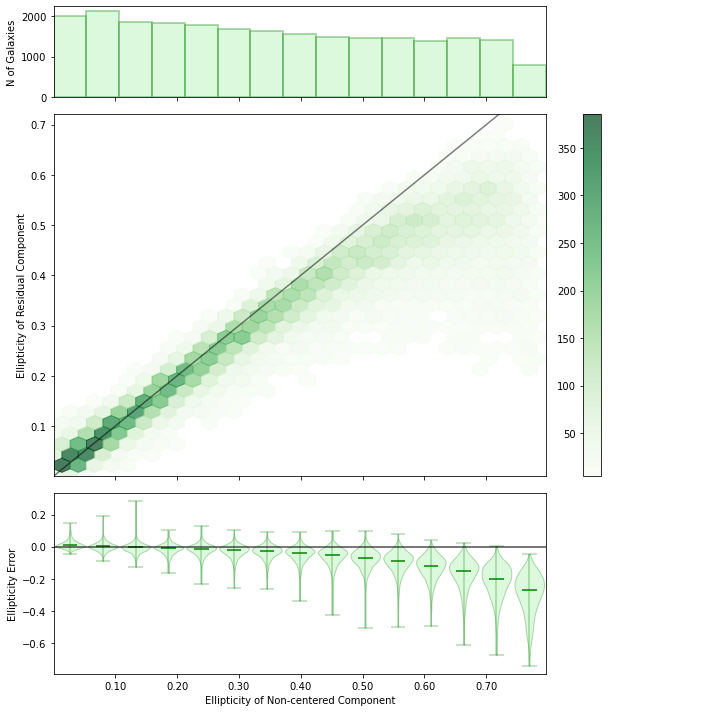

In [ ]:
c_ellip2_plot(c_ellip_in_comp2, c_ellip_out_comp2, c_c, c_outline)

In [ ]:
def c_flux1_plot(flux_in_comp1, flux_out_comp1, c, outline):
    
        
    flux1_errors = []
    
    min_of_bins_flux1 = np.min(flux_in_comp1)
    max_of_bins_flux1 = np.max(flux_in_comp1)
    flux1_bins = np.linspace(min_of_bins_flux1, max_of_bins_flux1, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux1A = (flux_in_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1B = (flux_out_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1_errors.append(flux1B - flux1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp1, bins = n_of_bins, range = [min_of_bins_flux1, max_of_bins_flux1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp1, flux_out_comp1, gridsize=30, cmap='Greens', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Central Component [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp1), np.max(flux_out_comp1)])

    flux1_bin_centres = 0.5 * (flux1_bins[:-1] + flux1_bins[1:])
    flux1_bin_widths = 0.9 * (flux1_bins[1] - flux1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")
    
    if flux1_errors:
        print("not empty")
    
    #print(np.min(flux1_errors))

    bp = ax2.violinplot(flux1_errors, positions=flux1_bin_centres, widths=flux1_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    ax2.axhline(y=0, color = 'black', alpha = 0.7)

    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Central Component [Input]")
    plt.xlim(min_of_bins_flux1, max_of_bins_flux1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

not empty
not empty


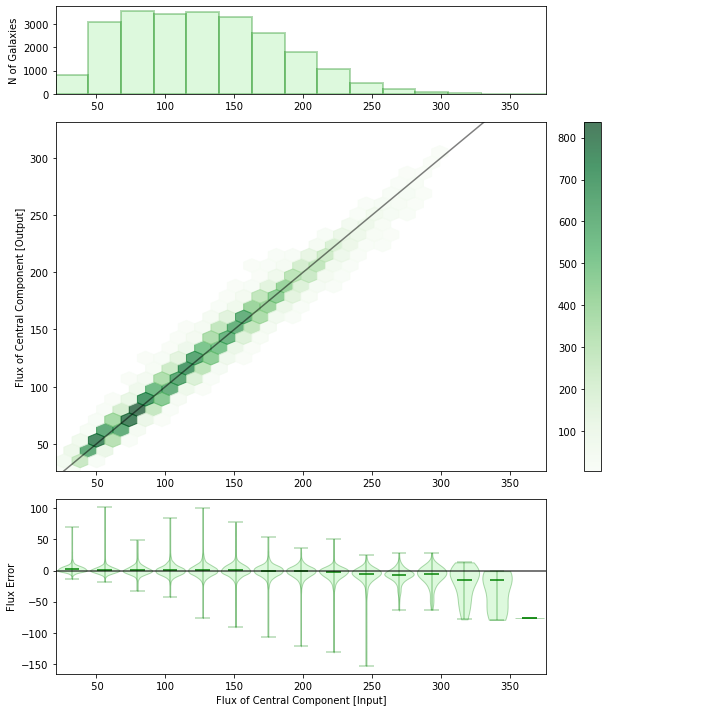

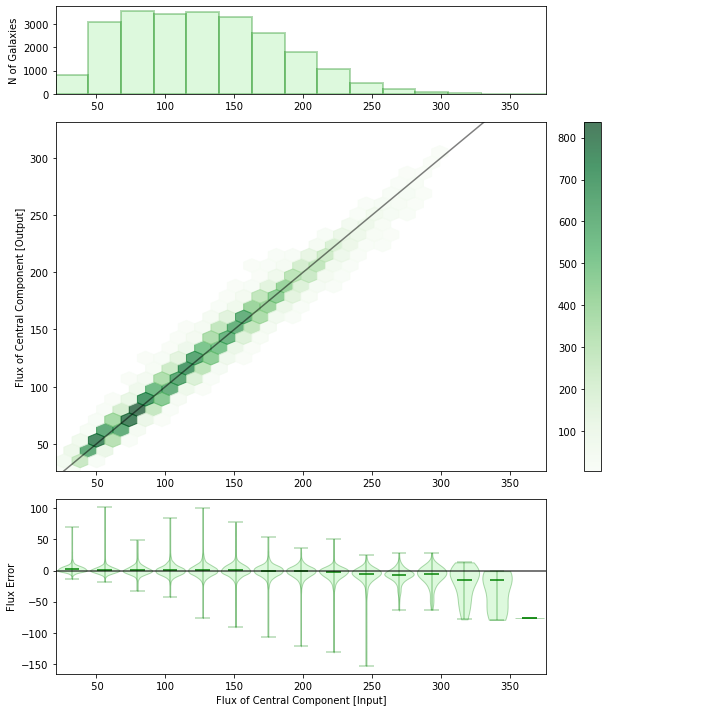

In [ ]:
c_flux1_plot(c_flux_in_comp1, c_flux_out_comp1, c_c, c_outline)

In [ ]:
def c_flux2_plot(flux_in_comp2, flux_out_comp2, c, outline):
    
        
    flux2_errors = []
    
    min_of_bins_flux2 = np.min(flux_in_comp2)
    max_of_bins_flux2 = np.max(flux_in_comp2)
    flux2_bins = np.linspace(min_of_bins_flux2, max_of_bins_flux2, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux2A = (flux_in_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2B = (flux_out_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2_errors.append(flux2B - flux2A)
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp2, bins = n_of_bins, range = [min_of_bins_flux2, max_of_bins_flux2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp2, flux_out_comp2, gridsize=30, cmap='Greens', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Residual Component")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp2), np.max(flux_out_comp2)])

    flux2_bin_centres = 0.5 * (flux2_bins[:-1] + flux2_bins[1:])
    flux2_bin_widths = 0.9 * (flux2_bins[1] - flux2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")
    

    bp = ax2.violinplot(flux2_errors, positions=flux2_bin_centres, widths=flux2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Non-centered Component")
    plt.xlim(min_of_bins_flux2, max_of_bins_flux2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

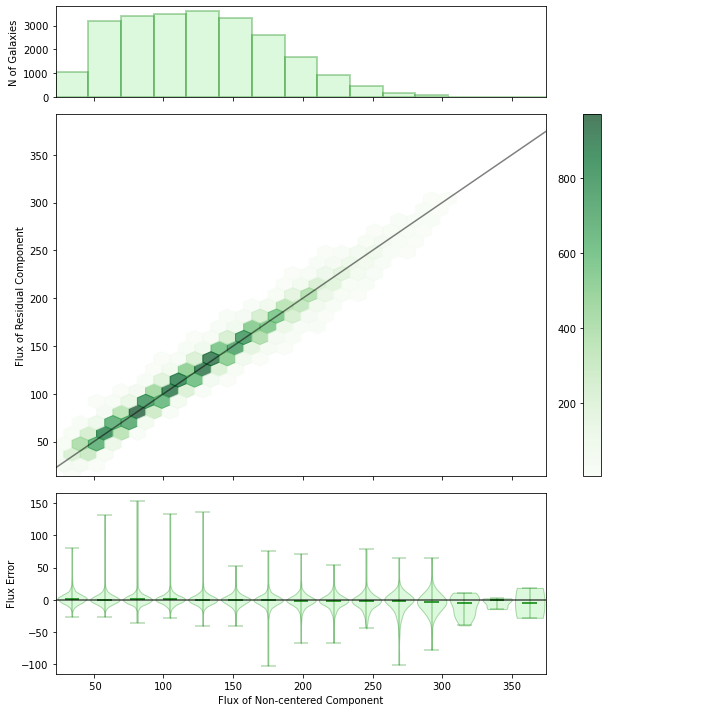

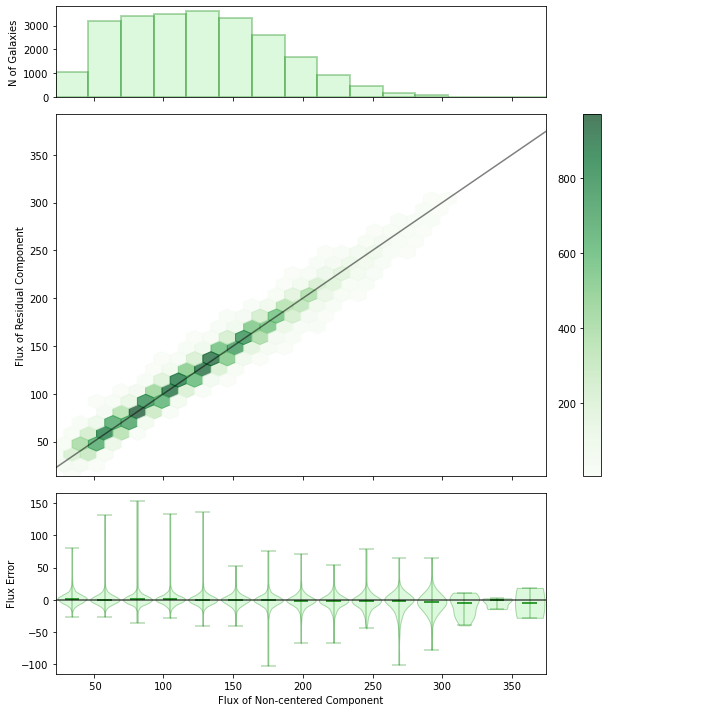

In [ ]:
c_flux2_plot(c_flux_in_comp2, c_flux_out_comp2, c_c, c_outline)

In [ ]:
#Seperate encoder approach

#load in the parameters 

#Save the parameters from the seperate encoder as se_parameters
se_parameters = np.load("se_parameters.npy")

#Load mine now for testing
#se_parameters = np.load("c_parameters.npy")

se_c = 'orangered'
se_outline = 'red'


se_ellip_in_comp1 = se_parameters[0]
se_ellip_out_comp1 = se_parameters[1]
se_flux_in_comp1 = se_parameters[2]
se_flux_out_comp1 = se_parameters[3]
se_ellip_in_comp2 = se_parameters[4]
se_ellip_out_comp2 = se_parameters[5]
se_flux_in_comp2 = se_parameters[6]
se_flux_out_comp2 = se_parameters[7]

In [ ]:
def se_ellip1_plot(ellip_in_comp1, ellip_out_comp1, c, outline):
    
        
    ellip1_errors = []
    
    min_of_bins_ellip1 = np.min(ellip_in_comp1)
    max_of_bins_ellip1 = np.max(ellip_in_comp1)
    ellip1_bins = np.linspace(min_of_bins_ellip1, max_of_bins_ellip1, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip1A = (ellip_in_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1B = (ellip_out_comp1[(ellip1_bins[i] <= ellip_in_comp1) & ( ellip_in_comp1 <= ellip1_bins[i+1])])
        ellip1_errors.append(ellip1B - ellip1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp1, bins = n_of_bins, range = [min_of_bins_ellip1, max_of_bins_ellip1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp1, ellip_out_comp1, gridsize=30, cmap='Reds', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Central Component [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp1), np.max(ellip_out_comp1)])

    ellip1_bin_centres = 0.5 * (ellip1_bins[:-1] + ellip1_bins[1:])
    ellip1_bin_widths = 0.9 * (ellip1_bins[1] - ellip1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")


    #Patch artit = True allows object to be treated as customisable shape
    bp = ax2.violinplot(ellip1_errors, positions=ellip1_bin_centres, widths=ellip1_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax2.set_xlabel("Ellipticity of Central Component [Input]")
    plt.xlim(min_of_bins_ellip1, max_of_bins_ellip1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

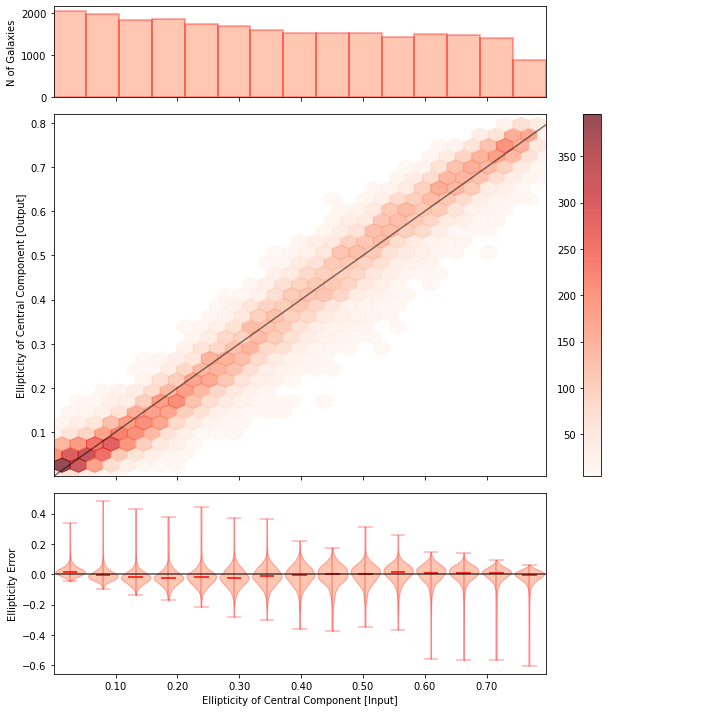

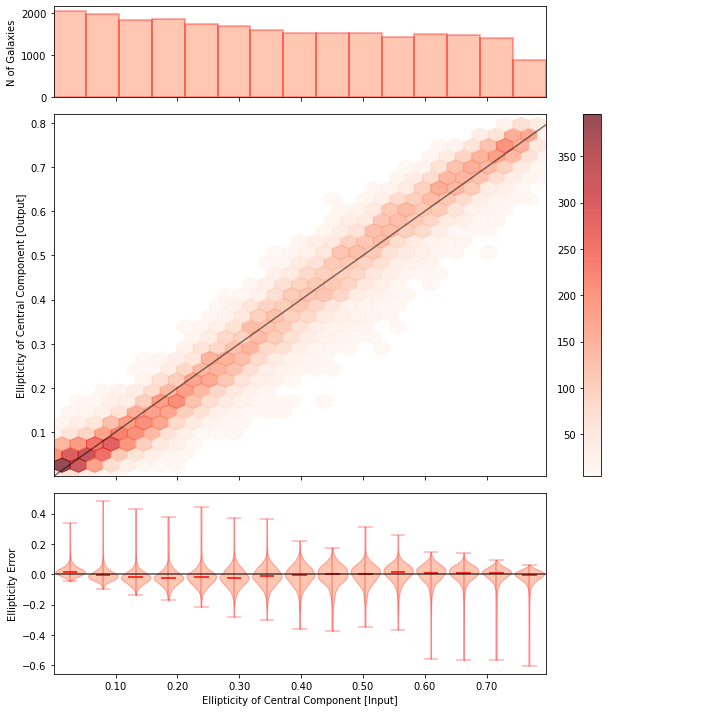

In [ ]:
se_ellip1_plot(se_ellip_in_comp1, se_ellip_out_comp1, se_c, se_outline)

In [ ]:
def se_ellip2_plot(ellip_in_comp2, ellip_out_comp2, c, outline):
    
        
    ellip2_errors = []
    
    min_of_bins_ellip2 = np.min(ellip_in_comp2)
    max_of_bins_ellip2 = np.max(ellip_in_comp2)
    ellip2_bins = np.linspace(min_of_bins_ellip2, max_of_bins_ellip2, n_of_bins+1)
    
    for i in range(n_of_bins):
        ellip2A = (ellip_in_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2B = (ellip_out_comp2[(ellip2_bins[i] <= ellip_in_comp2) & ( ellip_in_comp2 <= ellip2_bins[i+1])])
        ellip2_errors.append(ellip2B - ellip2A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(ellip_in_comp2, bins = n_of_bins, range = [min_of_bins_ellip2, max_of_bins_ellip2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(ellip_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(ellip_in_comp2, ellip_out_comp2, gridsize=30, cmap='Reds', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Ellipticity of Residual Component")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(ellip_out_comp2), np.max(ellip_out_comp2)])

    ellip2_bin_centres = 0.5 * (ellip2_bins[:-1] + ellip2_bins[1:])
    ellip2_bin_widths = 0.9 * (ellip2_bins[1] - ellip2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Ellipticity Error")


    bp = ax2.violinplot(ellip2_errors, positions=ellip2_bin_centres, widths=ellip2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax2.set_xlabel("Ellipticity of Non-centered Component")
    plt.xlim(min_of_bins_ellip2, max_of_bins_ellip2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

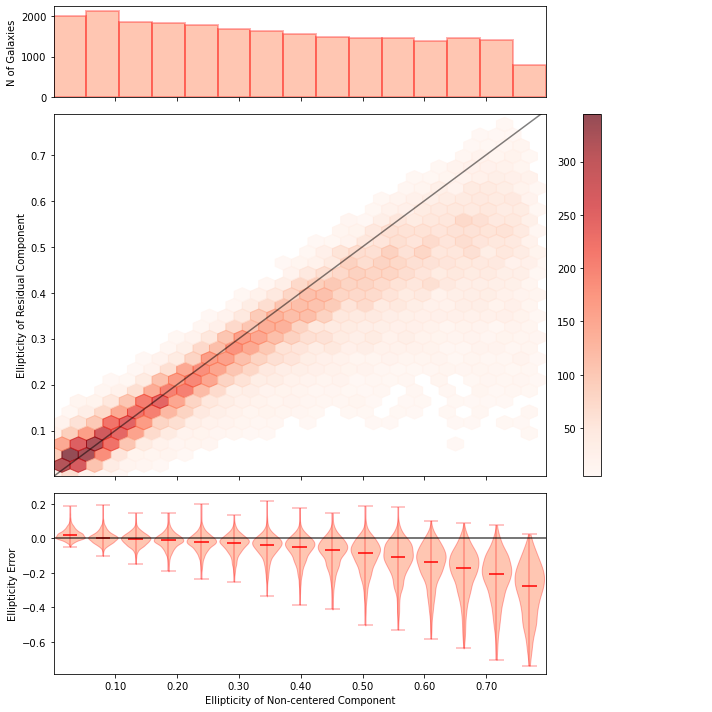

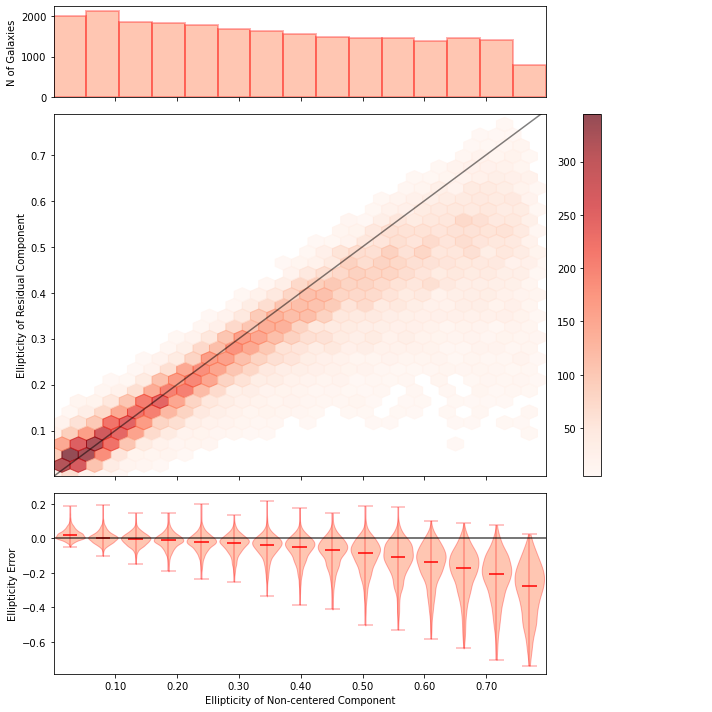

In [ ]:
se_ellip2_plot(se_ellip_in_comp2, se_ellip_out_comp2, se_c, se_outline)

In [ ]:
def se_flux1_plot(flux_in_comp1, flux_out_comp1, c, outline):
    
        
    flux1_errors = []
    
    min_of_bins_flux1 = np.min(flux_in_comp1)
    max_of_bins_flux1 = np.max(flux_in_comp1)
    flux1_bins = np.linspace(min_of_bins_flux1, max_of_bins_flux1, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux1A = (flux_in_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1B = (flux_out_comp1[(flux1_bins[i] <= flux_in_comp1) & ( flux_in_comp1 <= flux1_bins[i+1])])
        flux1_errors.append(flux1B - flux1A)
    
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp1, bins = n_of_bins, range = [min_of_bins_flux1, max_of_bins_flux1], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp1.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp1, flux_out_comp1, gridsize=30, cmap='Reds', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Central Component [Output]")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp1), np.max(flux_out_comp1)])

    flux1_bin_centres = 0.5 * (flux1_bins[:-1] + flux1_bins[1:])
    flux1_bin_widths = 0.9 * (flux1_bins[1] - flux1_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")


    bp = ax2.violinplot(flux1_errors, positions=flux1_bin_centres, widths=flux1_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Central Component [Input]")
    plt.xlim(min_of_bins_flux1, max_of_bins_flux1)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

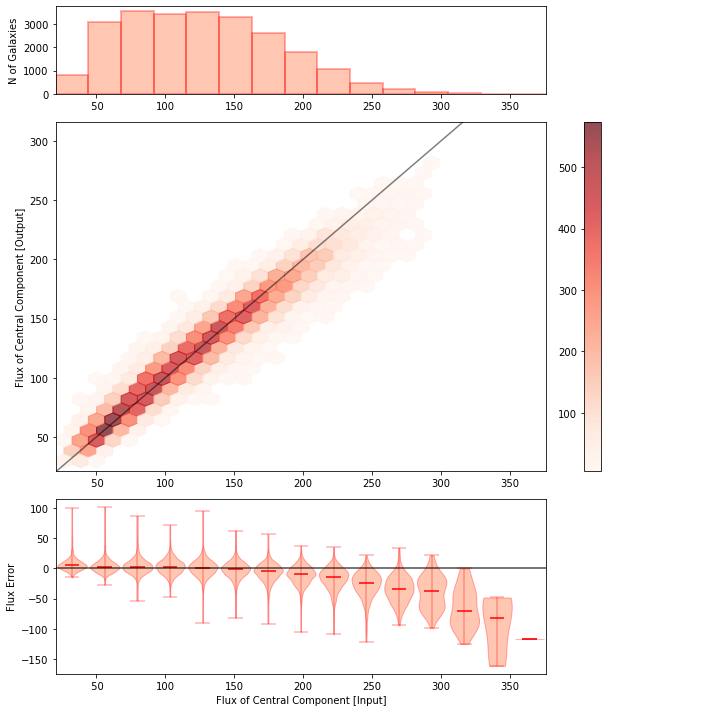

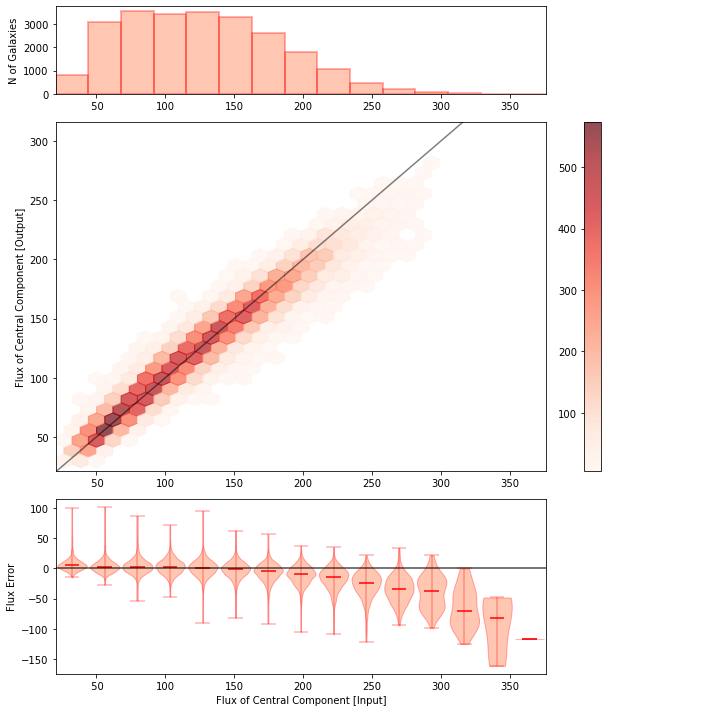

In [ ]:
se_flux1_plot(se_flux_in_comp1, se_flux_out_comp1, se_c, se_outline)

In [ ]:
def se_flux2_plot(flux_in_comp2, flux_out_comp2, c, outline):
    
        
    flux2_errors = []
    
    min_of_bins_flux2 = np.min(flux_in_comp2)
    max_of_bins_flux2 = np.max(flux_in_comp2)
    flux2_bins = np.linspace(min_of_bins_flux2, max_of_bins_flux2, n_of_bins+1)
    
    for i in range(n_of_bins):
        flux2A = (flux_in_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2B = (flux_out_comp2[(flux2_bins[i] <= flux_in_comp2) & ( flux_in_comp2 <= flux2_bins[i+1])])
        flux2_errors.append(flux2B - flux2A)
    
    fig = plt.figure(figsize = (10,10))

    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 4, 2], width_ratios=[4,1])
    #First plot
    ax0 = plt.subplot(gs[0, 0])


    histo1 = ax0.hist(flux_in_comp2, bins = n_of_bins, range = [min_of_bins_flux2, max_of_bins_flux2], alpha = 0.3, lw = 2, ec=outline, color = c)

    ax0.set_ylabel("N of Galaxies")

    ax1 = plt.subplot(gs[1, 0], sharex = ax0)

    n_mincnt = np.floor(flux_in_comp2.shape[0] / 10000) + 3

    hex1 = ax1.hexbin(flux_in_comp2, flux_out_comp2, gridsize=30, cmap='Reds', mincnt= n_mincnt, alpha=0.7)
    ax1.set_ylabel("Flux of Residual Component")
    #fig.colorbar(hex1, ax=ax1)

    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    #print(lims)
    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.5, zorder=1)

    colorbarax = plt.subplot(gs[1, 1])
    fig.colorbar(hex1, ax=colorbarax, location = 'left')
    colorbarax.axis('off')

    ax1.set_ylim([np.min(flux_out_comp2), np.max(flux_out_comp2)])

    flux2_bin_centres = 0.5 * (flux2_bins[:-1] + flux2_bins[1:])
    flux2_bin_widths = 0.9 * (flux2_bins[1] - flux2_bins[0])


    ax2 = plt.subplot(gs[2, 0], sharex = ax0)

    ax2.set_ylabel("Flux Error")


    bp = ax2.violinplot(flux2_errors, positions=flux2_bin_centres, widths=flux2_bin_widths, showmedians = True)
    
    
    for pc in bp['bodies']:
        pc.set_facecolor(c)
        pc.set_edgecolor(outline)
        pc.set
        pc.set_alpha(0.3)
        
    bp['cbars'].set_edgecolor(outline)
    bp['cbars'].set_alpha(0.3)
    bp['cmedians'].set_edgecolor(outline)
    bp['cmins'].set_edgecolor(outline)
    bp['cmins'].set_alpha(0.3)
    bp['cmaxes'].set_edgecolor(outline)
    bp['cmaxes'].set_alpha(0.3)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.axhline(y=0, color = 'black', alpha = 0.7)


    ax2.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))

    ax2.set_xlabel("Flux of Non-centered Component")
    plt.xlim(min_of_bins_flux2, max_of_bins_flux2)
    plt.subplots_adjust(hspace=.0)

    plt.tight_layout()
    plt.show()

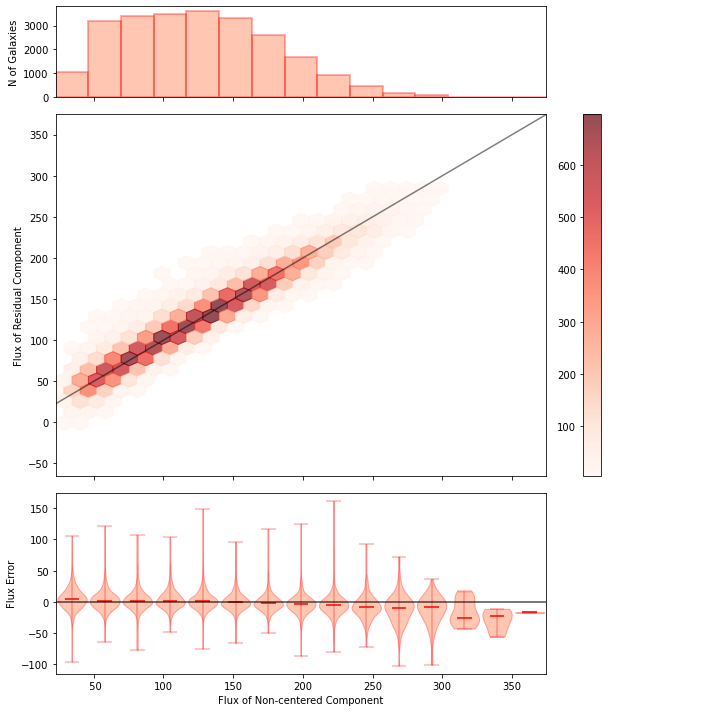

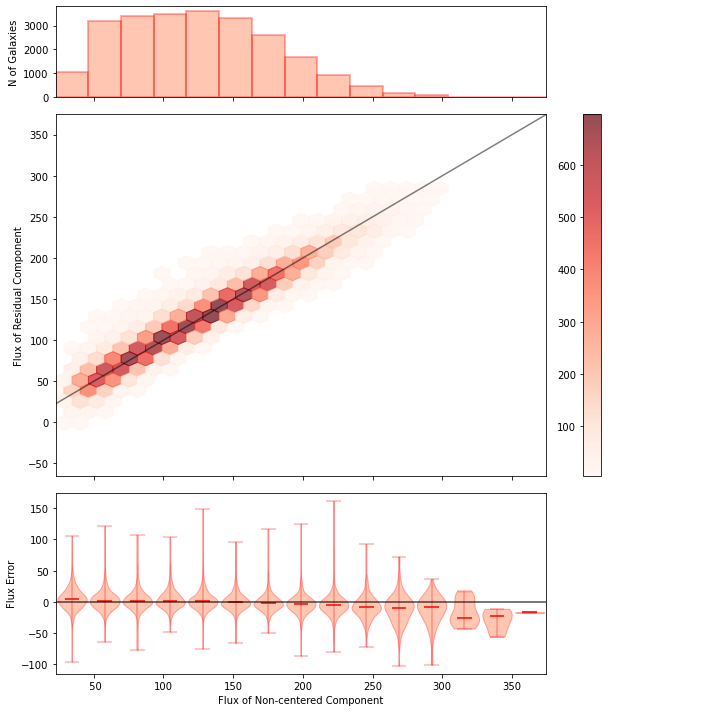

In [ ]:
se_flux2_plot(se_flux_in_comp2, se_flux_out_comp2, se_c, se_outline)